# 의사결정나무(Decision Tree)

* `스무고개`와 유사한 개념
* 의사결정나무는 `분류 Classification`와 `회귀 Regression`모두 가능한 알고리즘
* 기본적 아이디어는 `반복적 분할(Recursive Partitioning)`
<img src="./images/31.머신러닝_지도학습_2_descision_tree_01.png" width="500" height="300">

###### graphviz 설치
* tree구조의 그래프를 출력기능을 지원
* 다운로드 : https://graphviz.gitlab.io/_pages/Download/Download_windows.html
  1. 다운로드 & 설치
  1. path 설정 : sysdm.cpl
     - c:\Program Files\Graphviz\bin
     - c:\Program Files\Graphviz\bin\dot.exe(생략가능)
  1. `pip install graphvis` or `conda install graphviz`

In [1]:
!pip show graphviz

Name: graphviz
Version: 0.20.1
Summary: Simple Python interface for Graphviz
Home-page: https://github.com/xflr6/graphviz
Author: Sebastian Bank
Author-email: sebastian.bank@uni-leipzig.de
License: MIT
Location: C:\Anaconda3\Lib\site-packages
Requires: 
Required-by: 


In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.unicode_minus'] = False

import mglearn
import graphviz

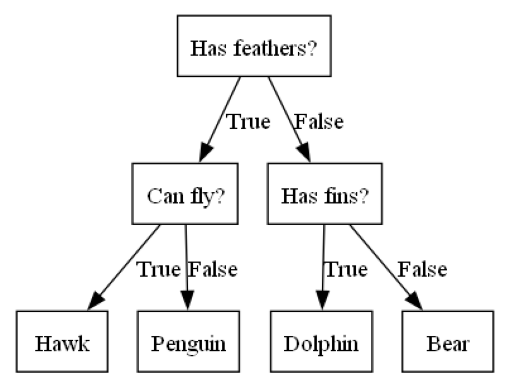

In [3]:
mglearn.plots.plot_animal_tree()

###### 결정트리

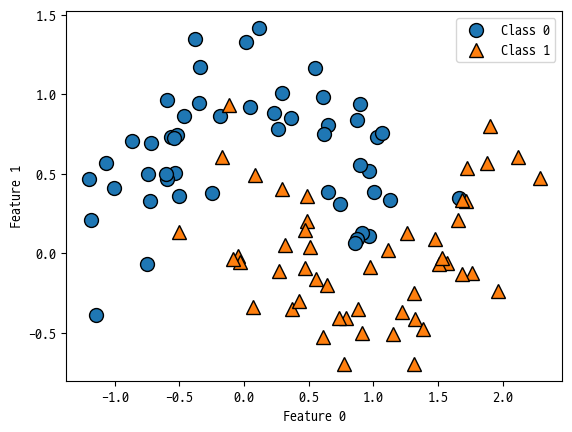

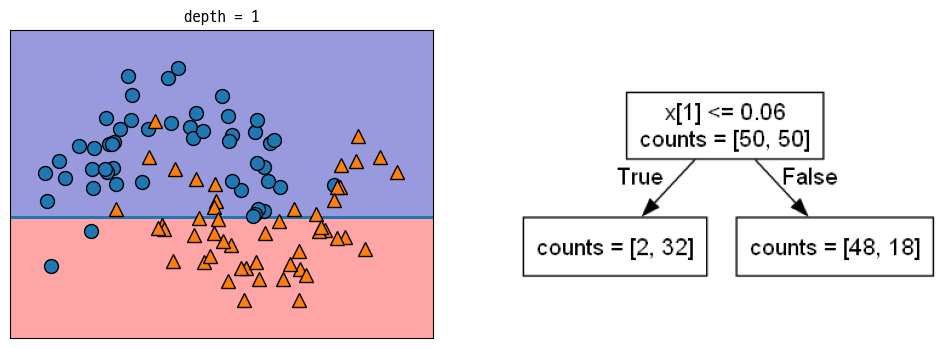

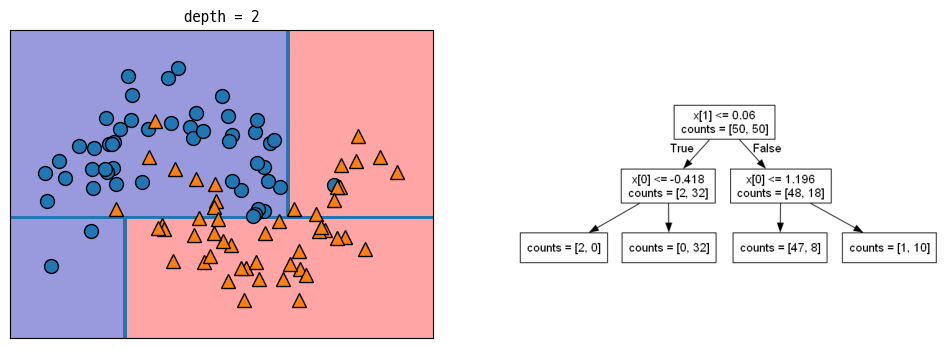

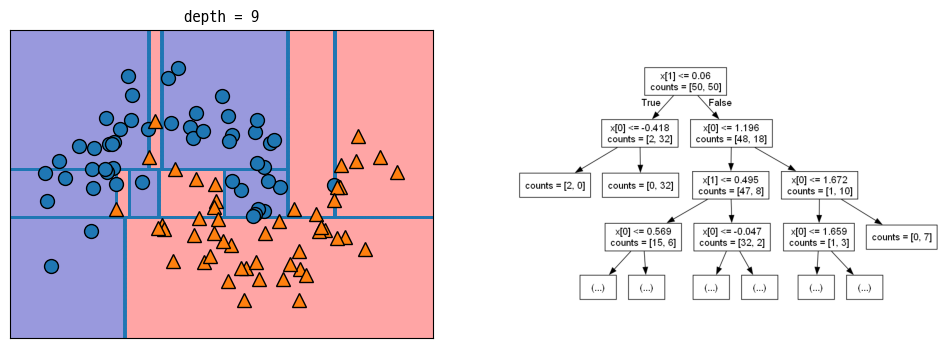

In [4]:
mglearn.plots.plot_tree_progressive()

###### 실습. 유방암데이터셋으로 Decision Tree 학습시키기

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f'cancer keys  = {cancer.keys()}')
print(f'cancer shape = {cancer.data.shape}')
print()

# 악성 212, 양성 357
print('클래스별 샘플 갯수:\n{}'.format(\
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print('특성이름:\n{}'.format(cancer.feature_names))

cancer keys  = dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
cancer shape = (569, 30)

클래스별 샘플 갯수:
{'malignant': 212, 'benign': 357}
특성이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [75]:
# sklearn의 dt알고리즘은 DecisionTreeClassifier(분류), DecisionTreeRegressor(회귀)
# 을 지원한다. sklearn은 과대적합화를 방지하기 위해서 사전가지치기를 지원한다.
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = \
    train_test_split(cancer.data, cancer.target
                     , stratify=cancer.target, random_state=0)
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print(f'훈련용데이터셋의 점수 = {tree.score(X_train, y_train):.2f}') 
print(f'검증용데이터셋의 점수 = {tree.score(X_test, y_test):.2f}') 

# 결과분석
# 예상한바와 같이 학습용세트의 정확도는 100%이다 즉, DT알고리즘은 모든 레이블(정담)을
# 정확하게 훈련이 되었다.
# 결정트리의 깊이를 제한하지 않으면 깊이가 무한정 깊어지고 복잡해질 수가 있다.
# 즉, 모델이 복잡하다는 것은 과대적합화가 발생이 되고 새로운 데이터는 예측을 못할 수가
# 있다는 것이다. 그래서 가지치기를 해서 모델의 복잡도를 낮추어서 새로운 데이터를 예측
# 할 수 있도록 조정을 한다.

# 현재 모델의 depth
print(f'현재 모델의 깊이 = {tree.get_depth()}')

훈련용데이터셋의 점수 = 1.00
검증용데이터셋의 점수 = 0.90
현재 모델의 깊이 = 5


In [76]:
# 사전가지치기
def d_tree(depth=7):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree.fit(X_train, y_train)
    print(f'현재 모델의 깊이 = {tree.get_depth()}')
    print(f'훈련용데이터셋의 점수 = {tree.score(X_train, y_train):.2f}') 
    print(f'검증용데이터셋의 점수 = {tree.score(X_test, y_test):.2f}') 
    print()
    
for d in range(7, 1, -2):
    d_tree(d)

현재 모델의 깊이 = 5
훈련용데이터셋의 점수 = 1.00
검증용데이터셋의 점수 = 0.90

현재 모델의 깊이 = 5
훈련용데이터셋의 점수 = 1.00
검증용데이터셋의 점수 = 0.90

현재 모델의 깊이 = 3
훈련용데이터셋의 점수 = 0.98
검증용데이터셋의 점수 = 0.92



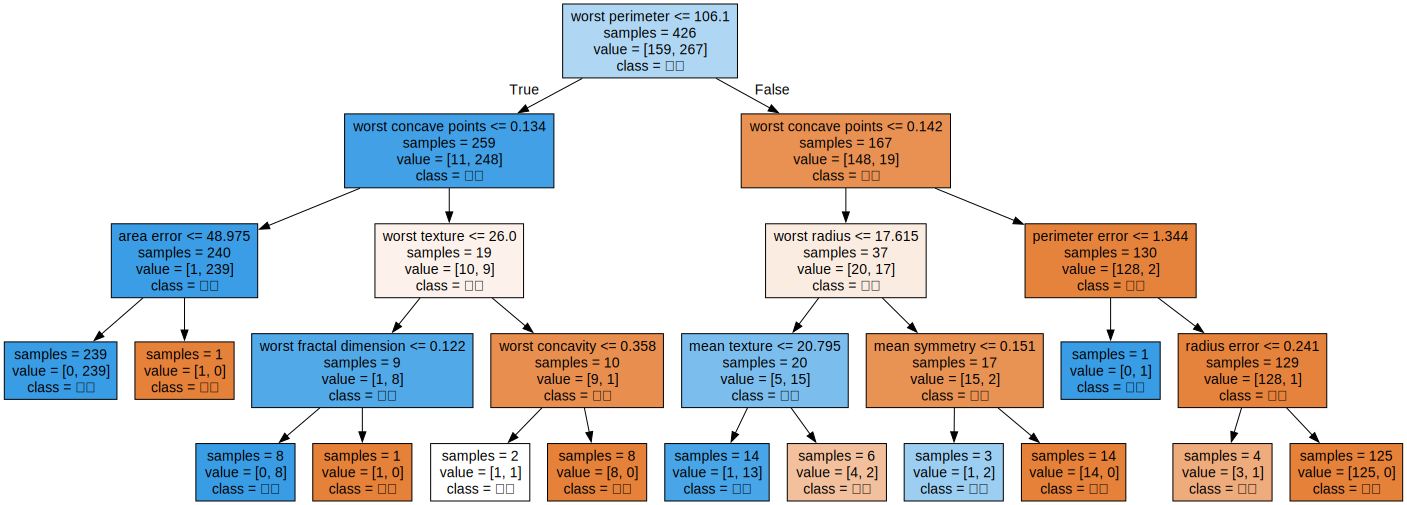

In [77]:
# 의사결정나무 그래프 저장하기
from sklearn.tree import export_graphviz

depth = 4
tree = DecisionTreeClassifier(max_depth=depth, random_state=0).fit(X_train, y_train)
export_graphviz(tree, out_file='./tree.dot', class_names=["악성", '양성']
               , feature_names=cancer.feature_names, impurity=False, filled=True)
with open('./tree.dot', encoding='utf-8') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

# 결과분석
# depth가 4만 되어도 모델의 복잡도가 높아진다. 깊이를 10정도하면 모델복잡도가
# 증가되어 새로운 데이터의 예측은 현저하게 떨어질 가능성이 있다.

###### 트리의 특성중요도

* 전체트리를 보는 것이 어려울 수가 있어 요약한 속성을 사용할 수가 있는데 가장 널리 사용하는 속성이 `특성중요도 feauture importance`이다.
* 이 값은 `0과 1사이의 값`으로 각 특성에 대해 0은 전혀사용되지 않았다는 의미디고 1은 완벽하게 타킷클래스를 예측했다는 의미이다.

In [78]:
print(f'특성의 중요도 = {tree.feature_importances_}\n')
print(f'가장 영향을 끼친 특성 : {np.argmax(tree.feature_importances_)}\n')
print(f'가장 영향을 끼친 특성 의 이름 : {cancer.feature_names[np.argmax(tree.feature_importances_)]}')

특성의 중요도 = [0.         0.01558601 0.         0.         0.         0.
 0.         0.         0.01150064 0.         0.00253726 0.
 0.01023272 0.01043016 0.         0.         0.         0.
 0.         0.         0.03848579 0.03087626 0.75708572 0.
 0.         0.         0.00418952 0.10976588 0.         0.00931004]

가장 영향을 끼친 특성 : 22

가장 영향을 끼친 특성 의 이름 : worst perimeter


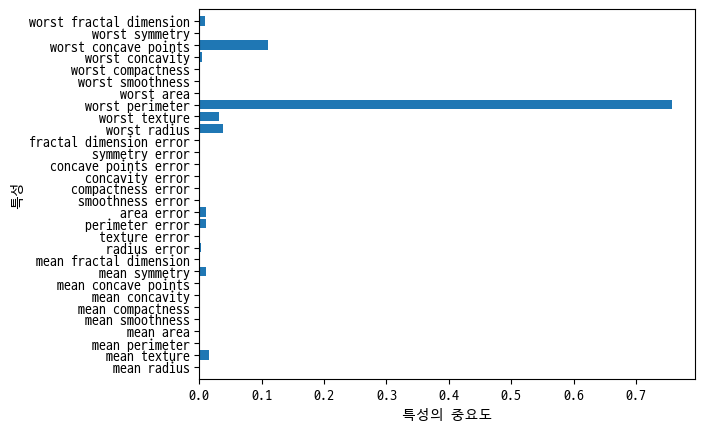

In [79]:
# 특성 중요도의 시각화
def cancer_feature_importance(model):
    n_features = cancer.data.shape[1]
    # print(n_features)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('특성의 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)
    
cancer_feature_importance(tree)

# 결과분석
# 현재 훈련용데이터엣에서 유방암의 악성,양성판단에 가장 많은 영향을 준 특성은 worst radius가 약 73%
# 로 나타난다. 다른 특성의 값이 낮다고 해서 해당특성이 유용하지 않다는 뜻이다. 단지 트리모델이 그
# 특성을 선택하지 않았을 뿐이다. 다른 훈련용데이터셋을 가지고(seed값을 조정) 훈련할 경우에는 다른
# 특성이 가장 중요한 특성으로 나타날 수 있다.
# 이런 것들은 여러가지 시나리오를 적용해서 가장 예측률이 높은 모델을 최작화모델로 설정해서 예측을 
# 하면 된다.

###### 실습 1. 붓꽃의 품종분류

In [81]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [89]:
iris = load_iris()
# print(iris.keys())
# print(iris.values())
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [93]:
print(f'타깃(품종)이름 : {iris.target_names}')
print(f'타깃(품종)특성 : {iris.feature_names}')
print(f'데이터의 크기 : {iris.data.shape}')

타깃(품종)이름 : ['setosa' 'versicolor' 'virginica']
타깃(품종)특성 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
데이터의 크기 : (150, 4)


In [97]:
# 모든 행의 3,4열만 선택
print(type(iris.data))
X = iris.data[:,[2,3]]
y = iris.target
print(X[:5], y[:5])
print(X[-5:], y[-5:])

<class 'numpy.ndarray'>
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]] [0 0 0 0 0]
[[5.2 2.3]
 [5.  1.9]
 [5.2 2. ]
 [5.4 2.3]
 [5.1 1.8]] [2 2 2 2 2]


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler().fit(X_train) # 평균 0, 분산 1인 정규분포로 정규화

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train_std[:5], y[:5])
print(X_train_std[-5:], y[-5:])
print()

print(X_test_std[:5], y[:5])
print(X_test_std[-5:], y[-5:])

[[-0.18295039 -0.29318114]
 [ 0.93066067  0.7372463 ]
 [ 1.04202177  1.63887031]
 [ 0.6522579   0.35083601]
 [ 1.09770233  0.7372463 ]] [0 0 0 0 0]
[[-1.29656144 -1.45241201]
 [ 0.98634122  0.7372463 ]
 [ 0.15113293 -0.29318114]
 [ 1.5988273   1.25246002]
 [-1.35224199 -1.32360858]] [2 2 2 2 2]

[[ 0.70793846  1.51006688]
 [ 0.09545238 -0.29318114]
 [-1.35224199 -1.32360858]
 [ 1.37610509  0.7372463 ]
 [-1.29656144 -1.32360858]] [0 0 0 0 0]
[[ 0.93066067  1.12365659]
 [-1.40792255 -1.32360858]
 [ 0.70793846  1.38126345]
 [-1.24088089 -0.80839486]
 [-1.29656144 -1.32360858]] [2 2 2 2 2]


In [102]:
# 1. 표준화전(데이터전처리전)
from sklearn.tree import DecisionTreeClassifier
iris_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X_train, y_train)
print(f'훈련용데이터셋의 점수 = {iris_tree.score(X_train, y_train):.2f}') 
print(f'검증용데이터셋의 점수 = {iris_tree.score(X_test, y_test):.2f}') 

훈련용데이터셋의 점수 = 0.98
검증용데이터셋의 점수 = 0.98


In [104]:
# 2. 표준화후
from sklearn.tree import DecisionTreeClassifier
iris_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X_train_std, y_train)
print(f'훈련용데이터셋의 점수 = {iris_tree.score(X_train_std, y_train):.2f}') 
print(f'검증용데이터셋의 점수 = {iris_tree.score(X_test_std, y_test):.2f}') 

훈련용데이터셋의 점수 = 0.98
검증용데이터셋의 점수 = 0.98


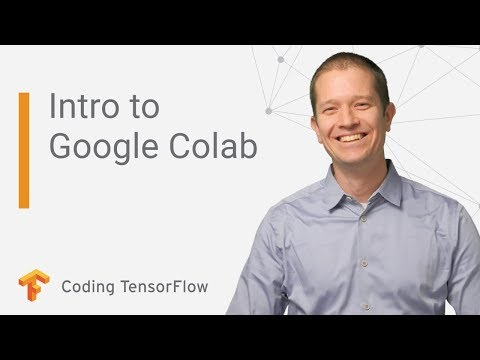

In [107]:
# 구글 코랩 사용법 강좌
from IPython.display import YouTubeVideo
YouTubeVideo("inN8seMm7UI", width=600, height=400)

# 결정트리의 앙상블

* 앙상블알고리즘에는 `랜덤 포레스트 Random Forest`와 `그레디언트 부스팅 Gradient Boosting` 결정트리가 있다.
* 의사결정나무의 가장 큰 단점은 과대적합화가 발생한다는 것이다. 이 단점을 보완한 알고리즘이 랜덤포레스트이다.
* 랜덤포레스트는 사전에 지정된 트리의 갯수의 결정트리에서 무작위로 몇 개의 결정트리를 선택해서 훈련하는 기계학습알고리즘이다.

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [124]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

forest = RandomForestClassifier(n_estimators=5, random_state=3)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=3)

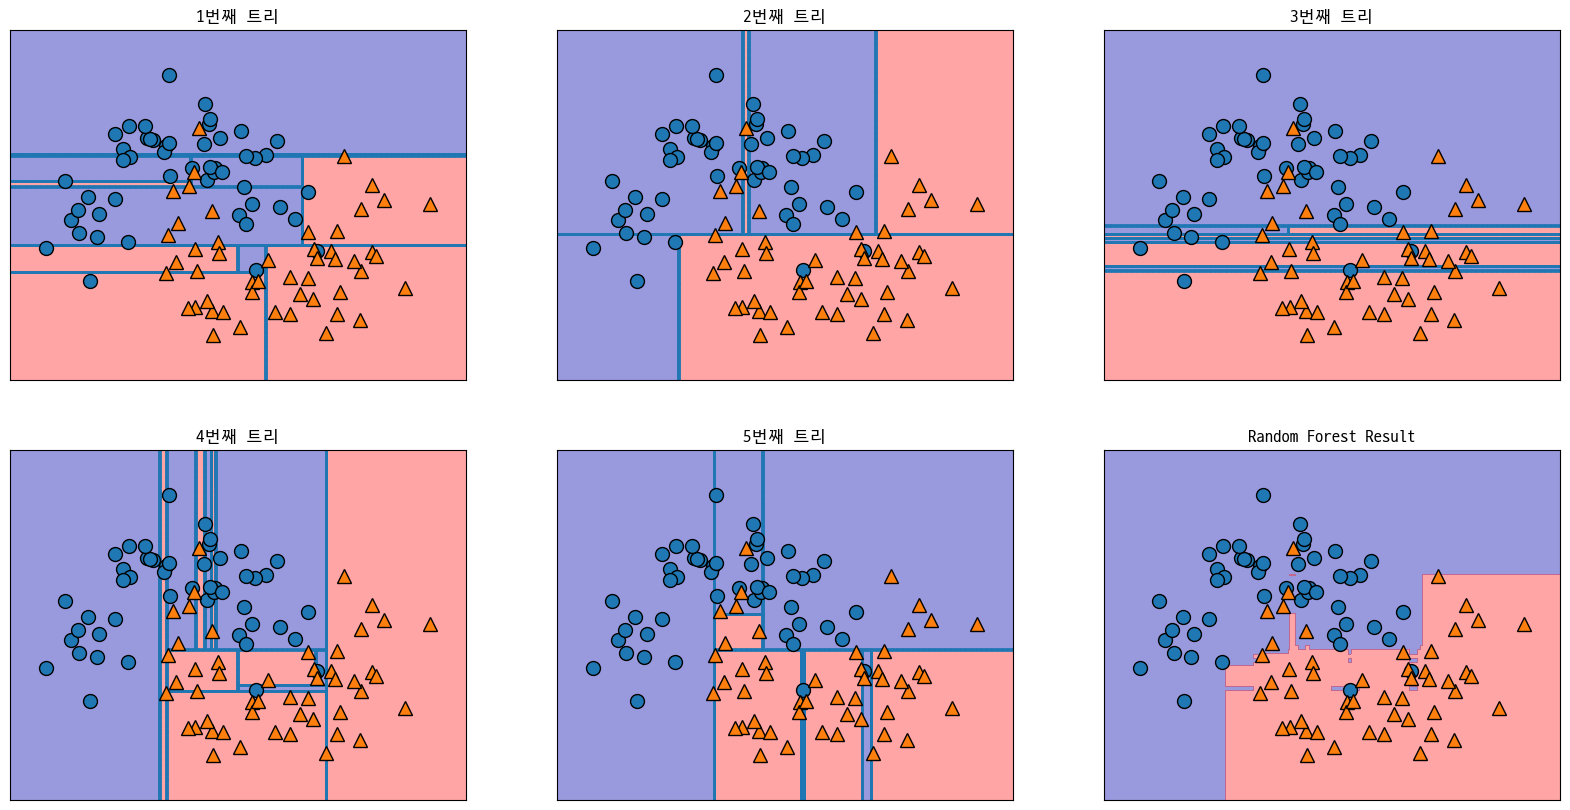

In [125]:
fig, axes = plt.subplots(2,3,figsize=(20,10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    # print(i, ax, tree)
    ax.set_title(f'{i+1}번째 트리')
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('Random Forest Result')
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.show()

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data
                                , cancer.target, stratify=cancer.target
                                , random_state=0)

In [7]:
# 실습. 유방암데이터셋을 랜덤포레스트모델 학습
# n_estimators=100(자유로 변경해서 적용)
forest = RandomForestClassifier(n_estimators=100, random_state=3)
forest.fit(X_train, y_train)
print(f'훈련용데이터셋의 점수 = {forest.score(X_train, y_train):.2f}') 
print(f'검증용데이터셋의 점수 = {forest.score(X_test, y_test):.2f}') 

훈련용데이터셋의 점수 = 1.00
검증용데이터셋의 점수 = 0.96
